In [ ]:
%%time
try:
    from icevision.all import *
except:
    !wget https://raw.githubusercontent.com/airctic/icevision/master/install_colab.sh
    !bash install_colab.sh

--2021-08-23 05:35:19--  https://raw.githubusercontent.com/airctic/icevision/master/install_colab.sh
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1244 (1.2K) [text/plain]
Saving to: ‘install_colab.sh’

install_colab.sh    100%[===================>]   1.21K  --.-KB/s    in 0s      

2021-08-23 05:35:19 (65.8 MB/s) - ‘install_colab.sh’ saved [1244/1244]

Installing icevision + dependencices for CUDA 10
Uninstalling some dependencies to prevent errors
Found existing installation: torchvision 0.10.0+cu102
Uninstalling torchvision-0.10.0+cu102:
  Successfully uninstalled torchvision-0.10.0+cu102
Found existing installation: fastai 1.0.61
Uninstalling fastai-1.0.61:
  Successfully uninstalled fastai-1.0.61
Installing some dependencies to prevent errors
     |██

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%%capture
%load_ext autoreload
%autoreload 2

import os
if not os.path.exists('/content/one_shot_omr_optum_intern_repo'):
    !pip install -U torch-snippets typer imgaug
    !git clone https://github.com/sizhky/one_shot_omr_optum_intern_repo

    %cd one_shot_omr_optum_intern_repo

In [3]:

from torch_snippets import *
root = P('/content/drive/MyDrive/dental-template')
unzip_file(root/'checkboxes.zip', '/content/check_boxes/')

2021-08-23 05:42:50.254 | WARNING  | torch_snippets:<module>:14 - sklearn is not found. Skipping relevant imports from submodule `sklegos`
Exception: No module named 'sklego'


In [4]:
from torch_snippets import *
from icevision.all import *

INFO     - Downloading default `.ttf` font file - SpaceGrotesk-Medium.ttf from https://raw.githubusercontent.com/airctic/storage/master/SpaceGrotesk-Medium.ttf to /root/.icevision/fonts/SpaceGrotesk-Medium.ttf | icevision.visualize.utils:get_default_font:69
INFO     - Downloading mmdet configs | icevision.models.mmdet.download_configs:download_mmdet_configs:31


0B [00:00, ?B/s]

WARNING  - This function will be deprecated, instantiate the concrete classes instead: `VOCBBoxParser`, `VOCMaskParser` | icevision.parsers.voc_parser:voc:18


  0%|          | 0/500 [00:00<?, ?it/s]

INFO     - Autofixing records | icevision.parsers.parser:parse:136


  0%|          | 0/400 [00:00<?, ?it/s]

AUTOFIX-SUCCESS - (record_id: 375) - Clipping bbox ymax from 808 to image height 806 (Before: <BBox (xmin:1132, ymin:781, xmax:1169, ymax:808)>) | icevision.utils.logger_utils:autofix_log:17
AUTOFIX-SUCCESS - (record_id: 91) - Clipping bbox ymax from 815 to image height 806 (Before: <BBox (xmin:1077, ymin:790, xmax:1126, ymax:815)>) | icevision.utils.logger_utils:autofix_log:17
AUTOFIX-SUCCESS - (record_id: 96) - Clipping bbox ymax from 811 to image height 806 (Before: <BBox (xmin:1097, ymin:790, xmax:1133, ymax:811)>) | icevision.utils.logger_utils:autofix_log:17
AUTOFIX-SUCCESS - (record_id: 96) - Clipping bbox ymax from 812 to image height 806 (Before: <BBox (xmin:1155, ymin:790, xmax:1192, ymax:812)>) | icevision.utils.logger_utils:autofix_log:17
AUTOFIX-SUCCESS - (record_id: 100) - Clipping bbox ymax from 813 to image height 806 (Before: <BBox (xmin:1119, ymin:787, xmax:1159, ymax:813)>) | icevision.utils.logger_utils:autofix_log:17
AUTOFIX-SUCCESS - (record_id: 100) - Clipping bb

  0%|          | 0/100 [00:00<?, ?it/s]

AUTOFIX-SUCCESS - (record_id: 123) - Clipping bbox ymax from 812 to image height 806 (Before: <BBox (xmin:1052, ymin:789, xmax:1119, ymax:812)>) | icevision.utils.logger_utils:autofix_log:17
AUTOFIX-SUCCESS - (record_id: 123) - Clipping bbox ymax from 813 to image height 806 (Before: <BBox (xmin:1116, ymin:790, xmax:1177, ymax:813)>) | icevision.utils.logger_utils:autofix_log:17
AUTOFIX-SUCCESS - (record_id: 289) - Clipping bbox ymax from 812 to image height 806 (Before: <BBox (xmin:1081, ymin:786, xmax:1126, ymax:812)>) | icevision.utils.logger_utils:autofix_log:17
AUTOFIX-SUCCESS - (record_id: 289) - Clipping bbox ymax from 812 to image height 806 (Before: <BBox (xmin:1146, ymin:787, xmax:1189, ymax:812)>) | icevision.utils.logger_utils:autofix_log:17
AUTOFIX-SUCCESS - (record_id: 421) - Clipping bbox ymax from 812 to image height 806 (Before: <BBox (xmin:1104, ymin:788, xmax:1134, ymax:812)>) | icevision.utils.logger_utils:autofix_log:17
AUTOFIX-SUCCESS - (record_id: 421) - Clipping

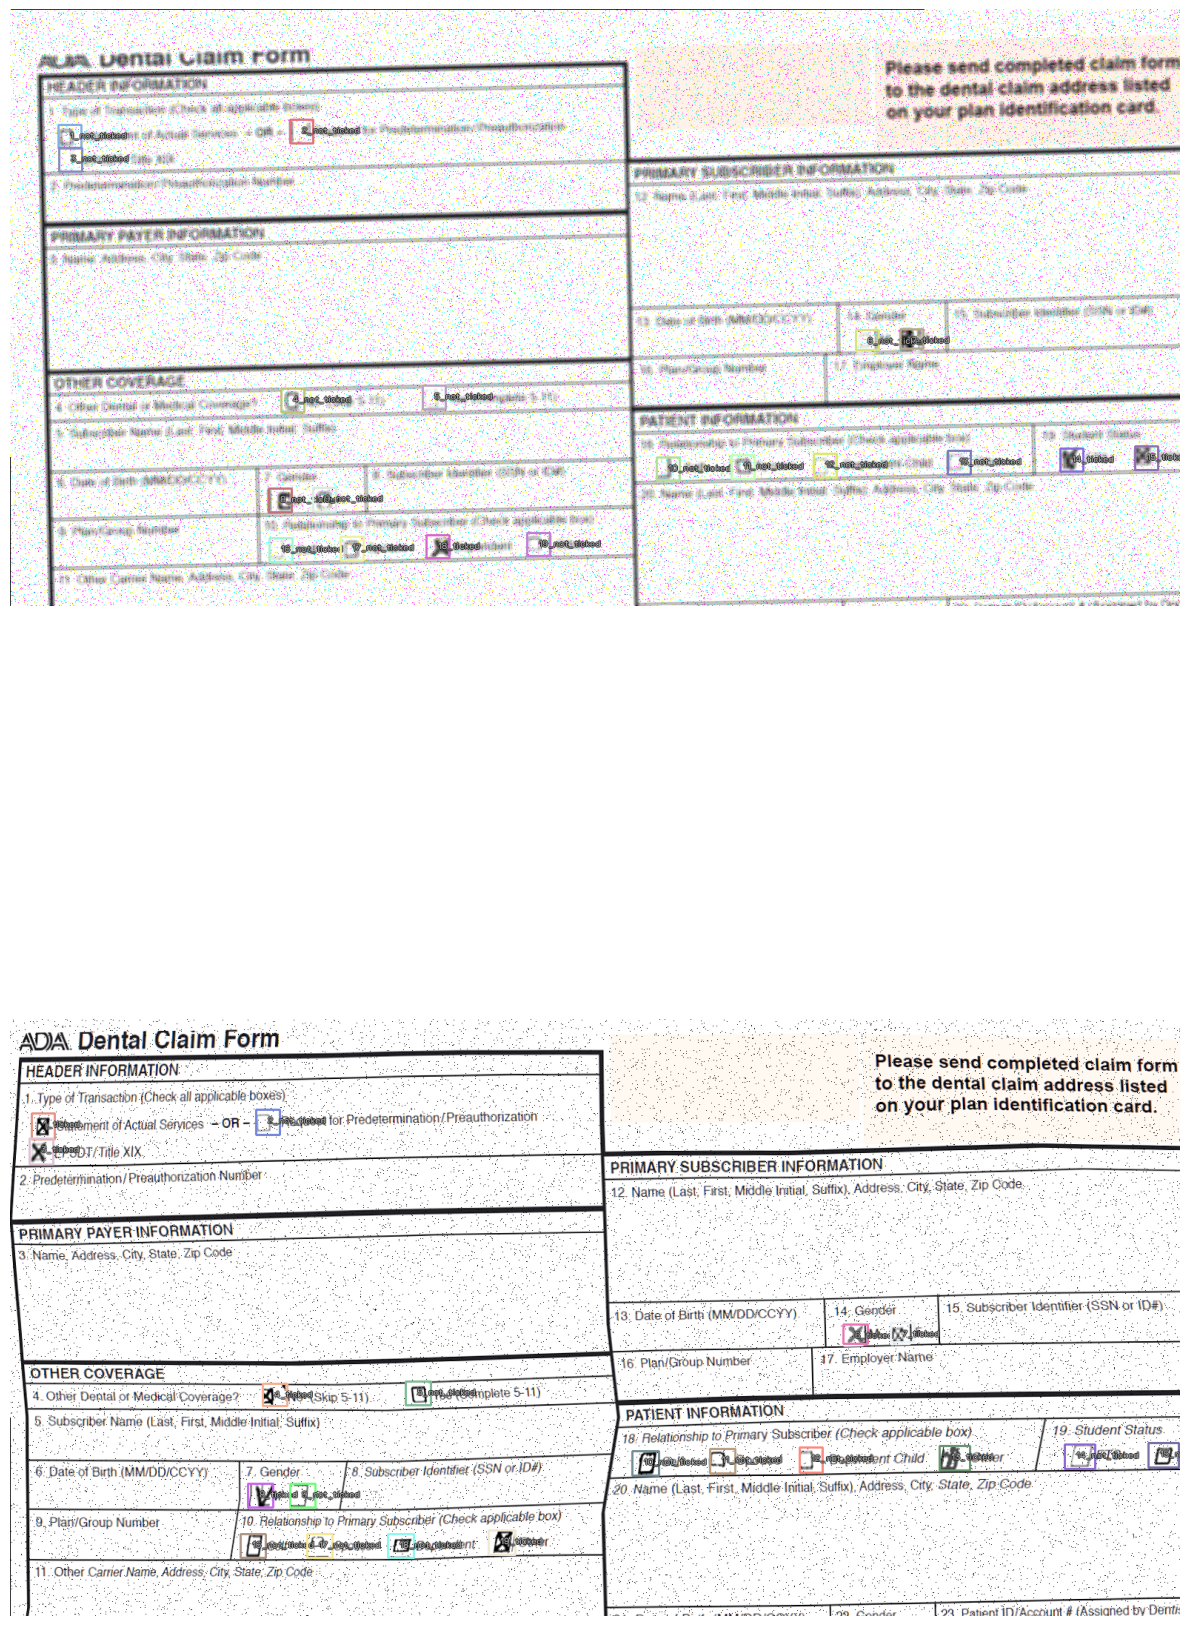

In [5]:

data_dir = Path('/content/drive/MyDrive/train-data/')
images_dir = data_dir / 'images'
annotations_dir = data_dir / 'annotations'
class_map = flatten([[f'{i}_ticked', f'{i}_not_ticked'] for i in range(1, 22)])
class_map = ClassMap(class_map)

parser = parsers.voc(annotations_dir=annotations_dir, images_dir=images_dir, class_map=class_map)
data_splitter = RandomSplitter((.8, .2))
train_records, valid_records = parser.parse(data_splitter)
show_records(train_records[0:2], ncols=1, class_map=class_map)

In [6]:
image_size = 384
train_tfms = tfms.A.Adapter([*tfms.A.aug_tfms(size=image_size, presize=512), tfms.A.Normalize()])
valid_tfms = tfms.A.Adapter([*tfms.A.resize_and_pad(image_size), tfms.A.Normalize()])
train_ds = Dataset(train_records, train_tfms)
valid_ds = Dataset(valid_records, valid_tfms)

In [7]:
extra_args = {}
model_type = models.ultralytics.yolov5
backbone = model_type.backbones.small
# The yolov5 model requires an img_size parameter  
# The efficientdet model requires an img_size parameter
extra_args['img_size'] = image_size
model = model_type.model(backbone=backbone(pretrained=True), num_classes=len(parser.class_map), **extra_args) 

  0%|          | 0.00/14.1M [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


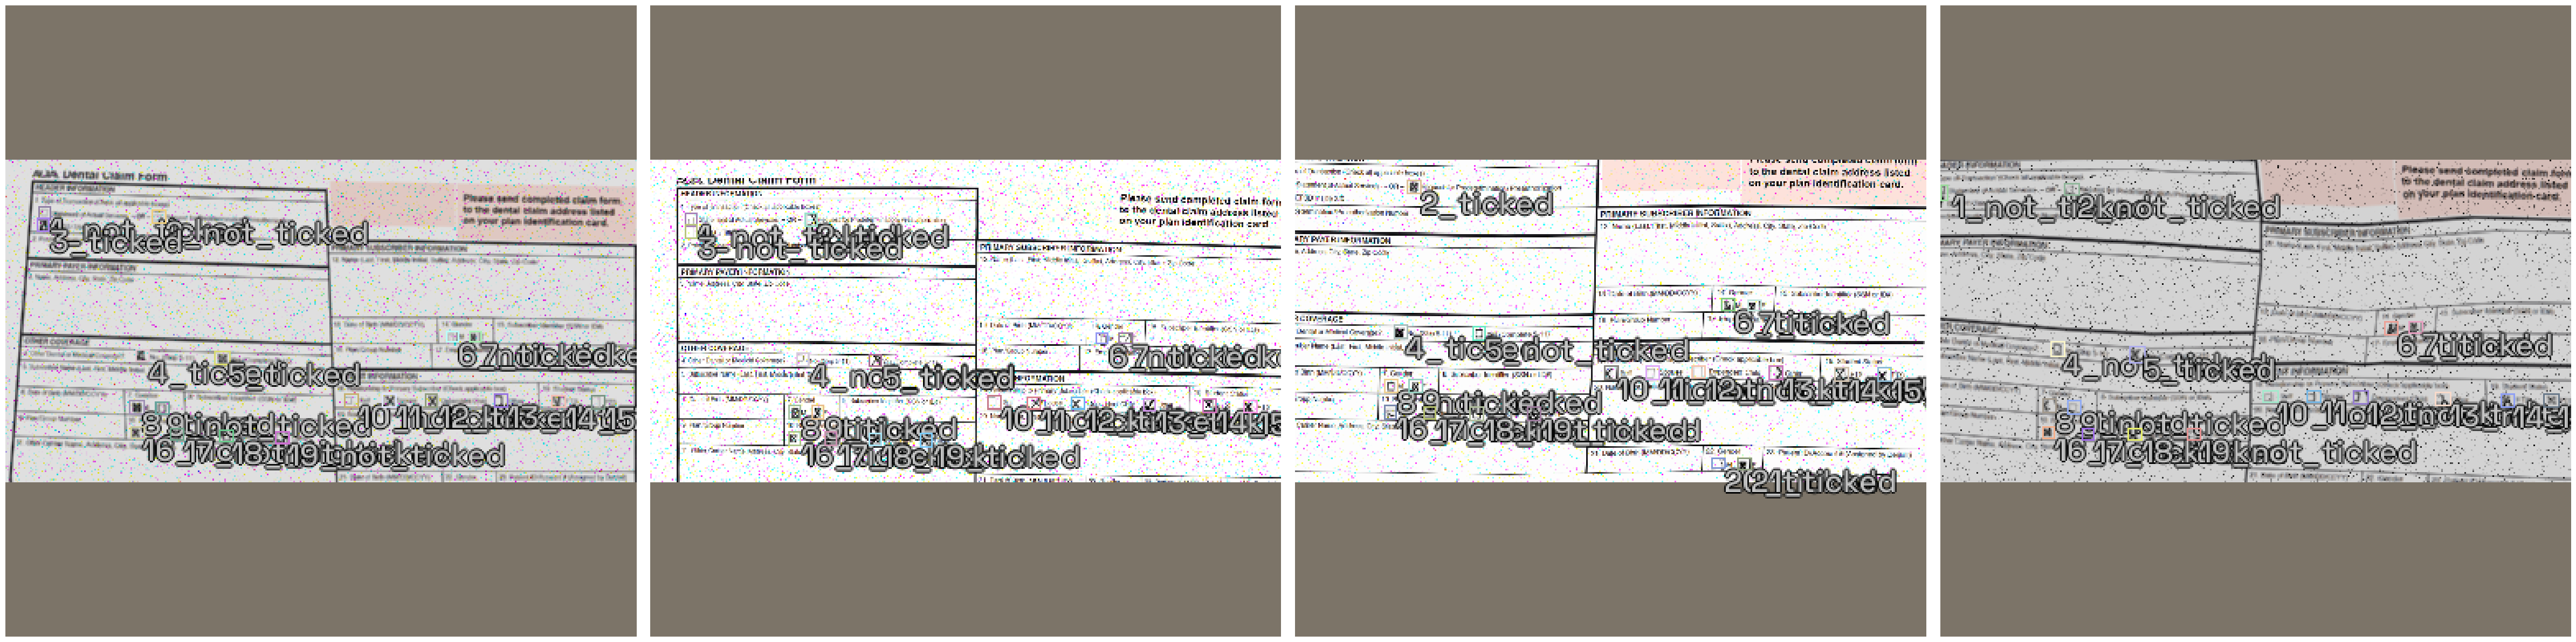

In [8]:
train_dl = model_type.train_dl(train_ds, batch_size=4, num_workers=4, shuffle=True)
valid_dl = model_type.valid_dl(valid_ds, batch_size=4, num_workers=4, shuffle=False)
model_type.show_batch(first(valid_dl), ncols=4)

In [16]:
from torch_snippets import load_torch_model_weights_to, save_torch_model_weights_from, makedir
load_torch_model_weights_to(model, root/'YOLO_PrakharV1 (1).pth')

INFO     - Loaded weights from /content/drive/MyDrive/dental-template/YOLO_PrakharV1 (1).pth to given model | __main__:<module>:2


In [17]:
metrics = [COCOMetric(metric_type=COCOMetricType.bbox)]
learn = model_type.fastai.learner(dls=[train_dl, valid_dl], model=model, metrics=metrics)
# learn.lr_find()

In [18]:
learn.fine_tune(100, 3e-3, freeze_epochs=3)

In [ ]:
# learn.fine_tune(10, 3e-4)
# learn.fine_tune(10, 3e-5)

In [19]:
infer_dl = model_type.infer_dl(valid_ds, batch_size=1, shuffle=False)
preds = model_type.predict_from_dl(model, infer_dl, detection_threshold=0.35, keep_images=True)

  0%|          | 0/100 [00:00<?, ?it/s]

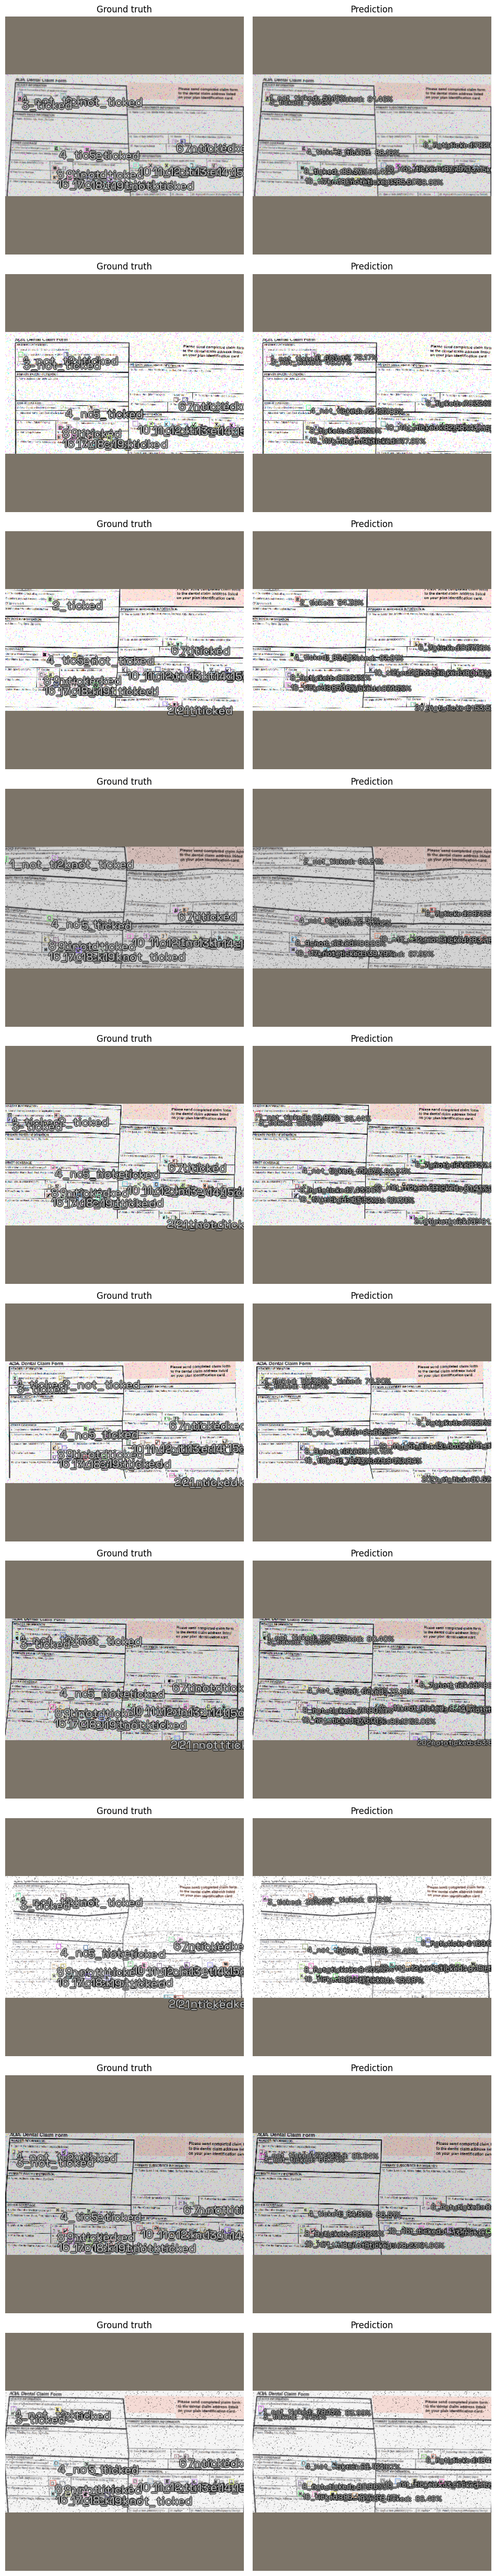

In [20]:
N = 10
show_preds(preds=preds[:N], figsize=(10,int(5*N)), ncols=2)

In [22]:

# makedir('drive/My Drive/icevision')
save_torch_model_weights_from(model, root/'YOLO_PrakharV3.pth')
#load_torch_model_weights_to(model, root/'YOLO.pth')

INFO     - Saved weights of size ~27 MB to /content/drive/MyDrive/dental-template/YOLO_PrakharV3.pth | __main__:<module>:3


  0%|          | 0/1 [00:00<?, ?it/s]

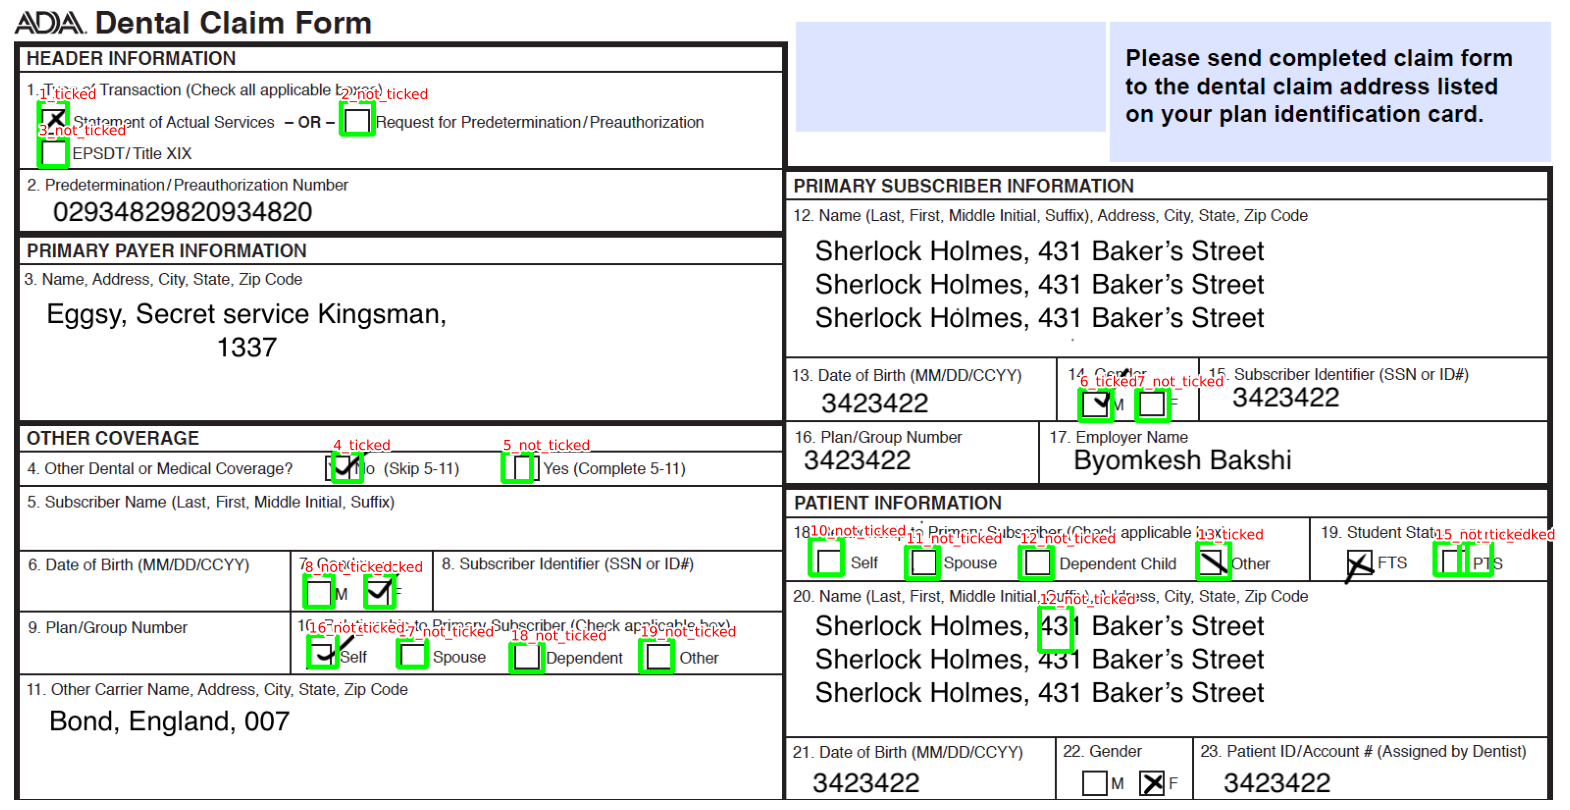

In [23]:
from collections import namedtuple
folder = root / "testing-images"
infer_tfms = tfms.A.Adapter([*tfms.A.resize_and_pad(size=384), tfms.A.Normalize()])
Pred = namedtuple('Pred', ['bbs','labels'])

def predict_on_folder_of_images(folder):
    fpaths = P(folder).Glob('*.png')
    imgs = [read(f, 1) for f in fpaths]
    infer_ds = Dataset.from_images(imgs, infer_tfms, class_map=class_map)

    infer_dl = model_type.infer_dl(infer_ds, batch_size=1)
    preds = model_type.predict_from_dl(model=model, infer_dl=infer_dl, keep_images=True)

    bboxes = [pred.pred.detection.bboxes for pred in preds]
    bboxes = [[(bbox.xmin, bbox.ymin, bbox.xmax, bbox.ymax) for bbox in bboxlist] for bboxlist in bboxes]
    bboxes = [[BB(int(x), int(y), int(X), int(Y)) for (x,y,X,Y) in bboxlist] for bboxlist in bboxes]
    shapes = [im.shape for im in imgs]
    pads = [((max(W, H) - min(W, H)) // 2) for H,W,_ in shapes]
    ws = [sh[1] for sh in shapes]
    bboxes = [[bb.remap((384,384), (ws[ix], ws[ix])) for bb in bblist] for ix, bblist in enumerate(bboxes)]
    bboxes = [[BB(x,y-pads[ix],X,Y-pads[ix]) for (x,y,X,Y) in bbs] for ix,bbs in enumerate(bboxes)]

    labels = [pred.pred.detection.labels for pred in preds]
    preds = lzip(bboxes, labels)
    preds = [Pred(*pred) for pred in preds]
    output = lzip(fpaths, preds)

    return output

for fpath, pred in predict_on_folder_of_images(folder):
    show(read(fpath, 1), bbs=pred.bbs, texts=pred.labels)